In [130]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [131]:
# aaf_url = 'https://www.dropbox.com/s/a0lj1ddd54ns8qy/All-Age-Faces%20Dataset.zip'
# !wget $aaf_url -P 'data'

In [132]:
# import zipfile
# with zipfile.ZipFile('data/All-Age-Faces Dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/aaf/')

In [133]:
fnames = get_image_files('data/aaf/All-Age-Faces Dataset/aglined faces')

In [134]:
dblock = DataBlock()

In [135]:
dsets = dblock.datasets(fnames)

In [136]:
def label_func(fname):
    return int(fname.name[-6:-4])

In [137]:
dblock = DataBlock( blocks = (ImageBlock, RegressionBlock), 
                    get_items = get_image_files,
                    get_y     = label_func,
                    splitter  = RandomSplitter(),
                    item_tfms = Resize(224))

dsets = dblock.datasets('data/aaf/All-Age-Faces Dataset/aglined faces')
dsets.train[0]

(PILImage mode=RGB size=301x371, tensor(24.))

In [138]:
dls = dblock.dataloaders(Path('data/aaf/All-Age-Faces Dataset/aglined faces'))

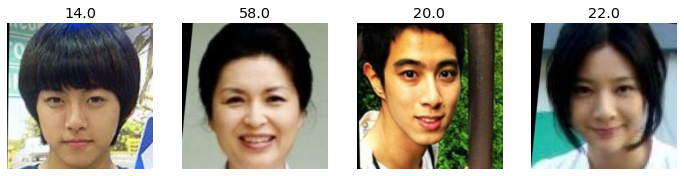

In [139]:
dls.valid.show_batch(max_n=4, nrows=1)

In [140]:
learn = cnn_learner(dls, resnet34, metrics=rmse)

In [141]:
learn.fine_tune(4)
learn.export()

epoch,train_loss,valid_loss,_rmse,time
0,1033.873413,626.019043,25.020370,02:36


epoch,train_loss,valid_loss,_rmse,time
0,328.631073,179.288528,13.389867,03:38
1,116.017525,80.860275,8.992233,03:39
2,81.307152,65.590607,8.098804,03:39
3,61.790997,61.855381,7.864820,03:40


In [148]:
learn_inf = load_learner('export.pkl')

In [149]:
# !wget 'https://images.thestar.com/LMFahhO4oBtAOyB24xoQ1gSPfW8=/1200x1200/smart/filters:cb(1548689313694)/https://www.thestar.com/content/dam/thestar/entertainment/television/analysis/2019/01/25/is-this-the-breakout-year-for-asian-men-in-leading-roles/simu_liu.jpg'

In [150]:
learn_inf.predict('simu_liu.jpg')

((29.60700225830078), tensor([29.6070]), tensor([29.6070]))

In [151]:

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [152]:
btn_upload = SimpleNamespace(data = ['simu_liu.jpg'])

In [153]:
img = PILImage.create(btn_upload.data[-1])


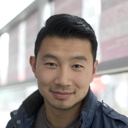

Output()

In [155]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


In [156]:
pred,pred_idx,probs = learn_inf.predict(img)


In [157]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred


IndexError: tensors used as indices must be long, byte or bool tensors